# Image preprocessing
Este notebook permite ver el preprocesado aplicado a los diferentes grupos de imágenes que se usarán para entrenar la
aplicación.
## Imports

In [1]:
import matplotlib.pyplot as plt
from image_preprocessing import *

## Imágenes captadas con microcontrolador
Todas las imágenes de este tipo se han captado con el mismo dispositivo. Por lo tanto no se tratará de forma distinta
las imágenes en función de su clase.

El preprocesado que se aplique debe ser igualmente aplicado directamente en el microcontrolador.

Primero se convertirá la imagen de RGB a escala de grises para reducir el tamaño de los datos.

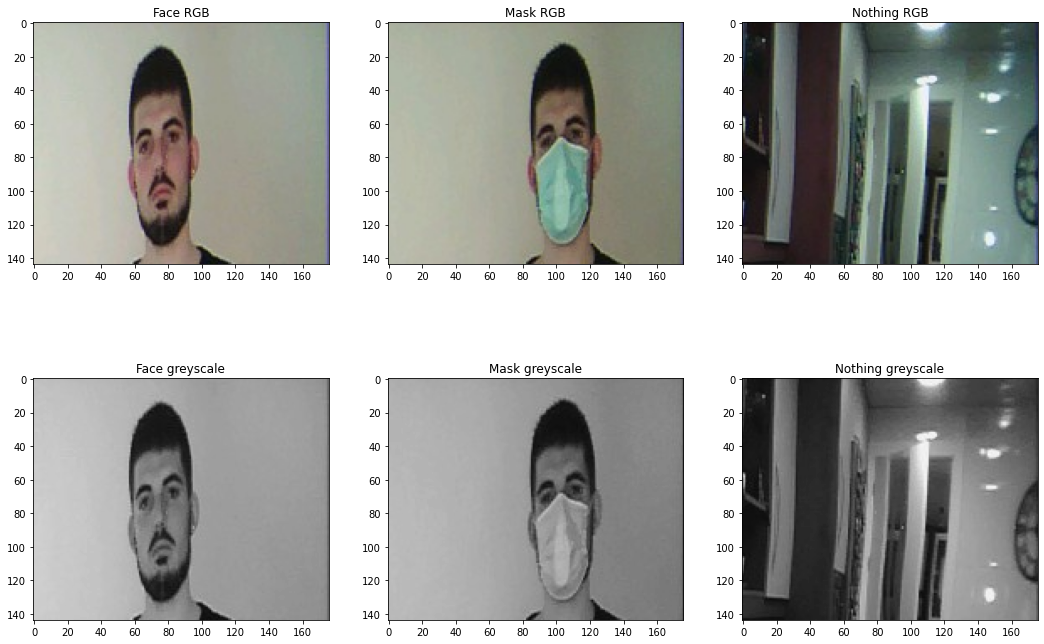

In [2]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
face = Image.open("../samples/microcontroller/image/face/3-4-2021--face9.jpg")
ax1.set_title("Face RGB")
ax1.imshow(face)
mask = Image.open("../samples/microcontroller/image/mask/3-4-2021--mask8.jpg")
ax2.set_title("Mask RGB")
ax2.imshow(mask)
nothing = Image.open("../samples/microcontroller/image/nothing/9-4-2021--nothing88.jpg")
ax3.set_title("Nothing RGB")
ax3.imshow(nothing)
face_greyscale = to_grayscale("", return_image=True, im=face)
ax4.set_title("Face greyscale")
ax4.imshow(face_greyscale, cmap='gray', vmin=0, vmax=255)
mask_greyscale = to_grayscale("", return_image=True, im=mask)
ax5.set_title("Mask greyscale")
ax5.imshow(mask_greyscale, cmap='gray', vmin=0, vmax=255)
nothing_greyscale = to_grayscale("", return_image=True, im=nothing)
ax6.set_title("Nothing greyscale")
ax6.imshow(nothing_greyscale, cmap='gray', vmin=0, vmax=255)
fig.set_size_inches(18, 12)

micro_color_face = micro_preprocessing("", return_image=True, im=face, color=True)
micro_color_mask = micro_preprocessing("", return_image=True, im=mask, color=True)
micro_color_nothing = micro_preprocessing("", return_image=True, im=nothing, color=True)

Después aplicamos un recorte de los extremos para obtener una imagen de 96x96 píxeles. El reescalado no es una opción
debido a que es una operación costosa para el microcontrolador.

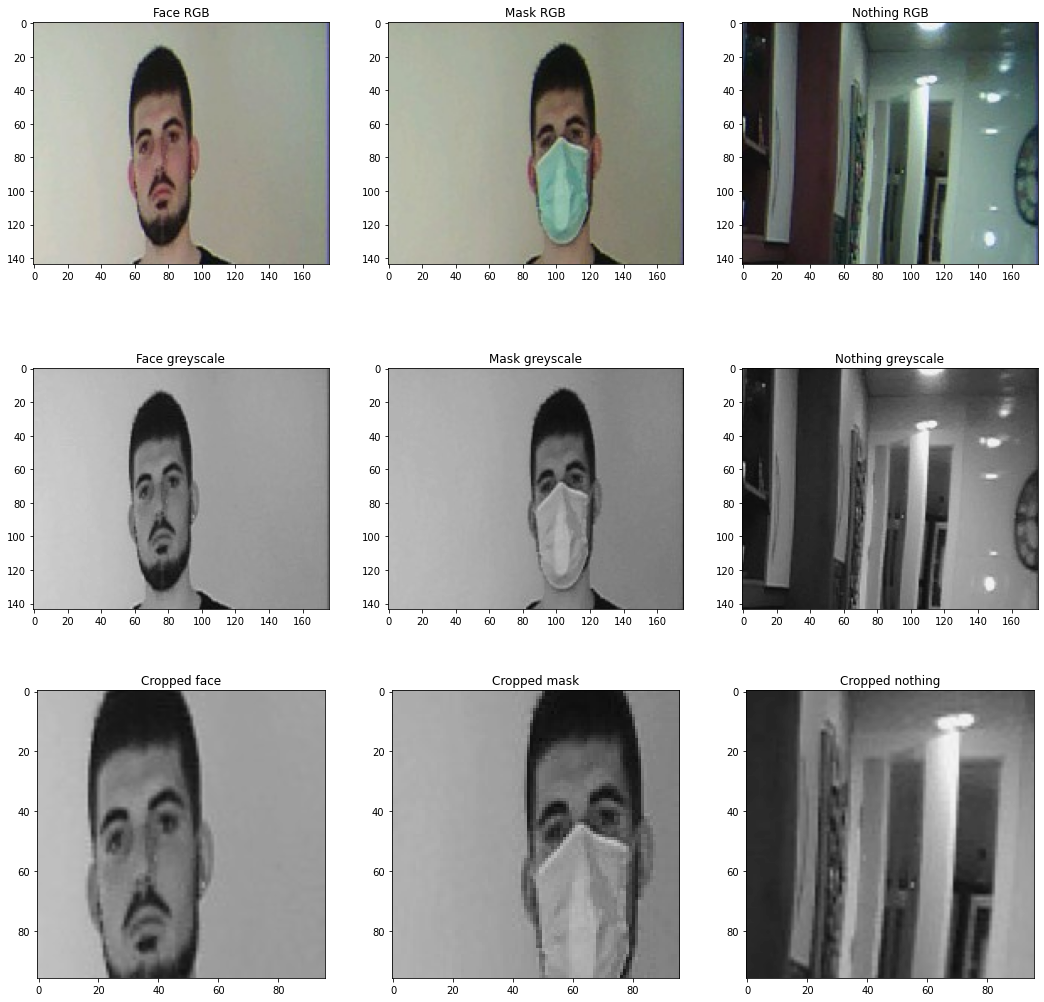

In [3]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
ax1.set_title("Face RGB")
ax1.imshow(face)
ax2.set_title("Mask RGB")
ax2.imshow(mask)
ax3.set_title("Nothing RGB")
ax3.imshow(nothing)
ax4.set_title("Face greyscale")
ax4.imshow(face_greyscale, cmap='gray', vmin=0, vmax=255)
ax5.set_title("Mask greyscale")
ax5.imshow(mask_greyscale, cmap='gray', vmin=0, vmax=255)
ax6.set_title("Nothing greyscale")
ax6.imshow(nothing_greyscale, cmap='gray', vmin=0, vmax=255)
cropped_face = centered_crop("", 96, 96, return_image=True, im=face_greyscale)
ax7.set_title("Cropped face")
ax7.imshow(cropped_face, cmap='gray', vmin=0, vmax=255)
cropped_mask = centered_crop("", 96, 96, return_image=True, im=mask_greyscale)
ax8.set_title("Cropped mask")
ax8.imshow(cropped_mask, cmap='gray', vmin=0, vmax=255)
cropped_nothing = centered_crop("", 96, 96, return_image=True, im=nothing_greyscale)
ax9.set_title("Cropped nothing")
ax9.imshow(cropped_nothing, cmap='gray', vmin=0, vmax=255)
fig.set_size_inches(18, 18)

## Imágenes externas

El preprocesado de las imágenes externas variará en función de la clase, debido a que las imágenes de cada una tienen un
origen y características distintas.

### Face

Las imágenes de la clase face tienen las caras relativamente centradas con un margen superior e inferior y una
resolución similares a las imágenes captadas con microcontrolador, por lo que aplicar el mismo preprocesado parece
una aproximación adecuada.

Se aplicará un reescalado para que la imagen se estreche un poco, pues se ha observado que las imágenes captadas con la
lente del microcontrolador tienen las caras más estrechadas, con espacios vacios a los laterales

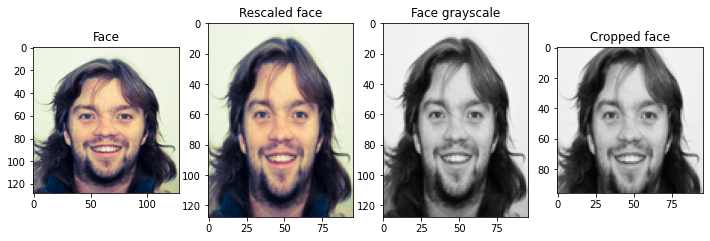

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
face = Image.open("../samples/external/image/face/00682.png")
ax1.imshow(face)
ax1.set_title("Face")
rescaled_face = rescale("", 96, 128, return_image=True, im=face)
ax2.imshow(rescaled_face, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Rescaled face")
face_grayscale = to_grayscale("", return_image=True, im=rescaled_face)
ax3.imshow(face_grayscale, cmap='gray', vmin=0, vmax=255)
ax3.set_title("Face grayscale")
cropped_face = centered_crop("", 96, 96, return_image=True, im=face_grayscale)
ax4.imshow(cropped_face, cmap='gray', vmin=0, vmax=255)
ax4.set_title("Cropped face")
fig.set_size_inches(12, 24)

### Mask
En el caso de las imágenes de la clase mask vemos que tienen una resolución muy superior a la que queremos obtener como
resultado, así que hay que aplicar un reescalado dado que si solo aplicamos recorte se eliminaría demasiada información.
Aun así no se realizará un reescalado a la resolución deseada directamente, sino que se reescalará a 96x128 y luego se
añadirá el recorte a 96x96 de forma que el porcentaje que ocupan las caras en la imagen será más similar al que hemos
encontrado en las imágenes capturadas con microcontrolador preprocesadas.

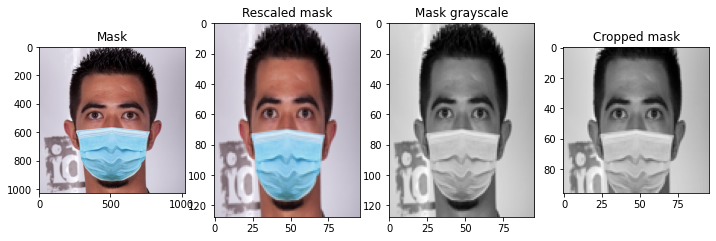

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
mask = Image.open("../samples/external/image/mask/00012_Mask.jpg")
ax1.imshow(mask)
ax1.set_title("Mask")
rescaled_mask = rescale("", 96, 128, return_image=True, im=mask)
ax2.imshow(rescaled_mask)
ax2.set_title("Rescaled mask")
mask_grayscale = to_grayscale("", return_image=True, im=rescaled_mask)
ax3.set_title("Mask grayscale")
ax3.imshow(mask_grayscale, cmap='gray', vmin=0, vmax=255)
cropped_mask = centered_crop("", 96, 96, return_image=True, im=mask_grayscale)
ax4.set_title("Cropped mask")
ax4.imshow(cropped_mask, cmap='gray', vmin=0, vmax=255)
fig.set_size_inches(12, 24)

### Nothing
El caso de las imágenes externas que se usarán para representar la clase nothing es el que más dista del tipo de
imágenes que necesitamos. Estas imágenes no tienen una relación de aspecto regular, de manera que será necesario
modificarla: Para corregir la relación de aspecto primero se comprobará si tiene más píxeles de amplitud o de altura y
se reescalará la imagen para que la dimensión más pequeña pase a ser de 96 píxeles. Una vez realizado el reescalado, se
recorta respecto a la dimensión más grande hasta que iguale a la pequeña en 96 píxeles. También se aplica la conversión
a escala de grises.

width: 296px
height: 370px
new_height: 120px


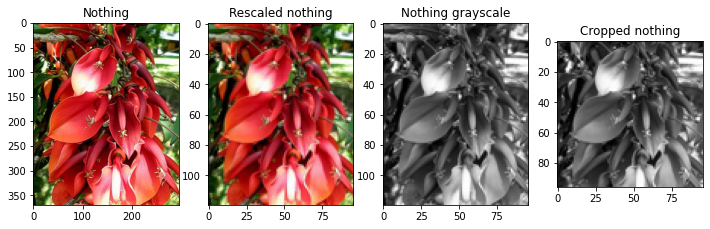

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
nothing = Image.open("../samples/external/image/nothing/flower_0105.jpg")
ax1.set_title("Nothing")
ax1.imshow(nothing)
width, height = nothing.size
print(f"width: {width}px")
print(f"height: {height}px")
new_height = int(height * (96 / width))
print(f"new_height: {new_height}px")
rescaled_nothing = rescale("", 96, new_height, return_image=True, im=nothing)
ax2.set_title("Rescaled nothing")
ax2.imshow(rescaled_nothing)
nothing_greyscale = to_grayscale("", return_image=True, im=rescaled_nothing)
ax3.set_title("Nothing grayscale")
ax3.imshow(nothing_greyscale, cmap='gray', vmin=0, vmax=255)
cropped_nothing = centered_crop("", 96, 96, return_image=True, im=nothing_greyscale)
ax4.set_title("Cropped nothing")
ax4.imshow(cropped_nothing, cmap='gray', vmin=0, vmax=255)
fig.set_size_inches(12, 24)